In [1]:
import os
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

# Mouse

### Montoro_10x

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,organ,organism,platform
M1_GCTTGAGAAGTCGT_Club,club cell,CL:0000158,Club,Montoro_10x,M1,Trachea,Mus musculus,10x
M1_GGAACACTTTCGTT_Club,club cell,CL:0000158,Club,Montoro_10x,M1,Trachea,Mus musculus,10x
M1_GGAATGCTTCGACA_Club,club cell,CL:0000158,Club,Montoro_10x,M1,Trachea,Mus musculus,10x
M1_GGACAACTCTGAGT_Basal,basal cell of epithelium of trachea,CL:1000348,Basal,Montoro_10x,M1,Trachea,Mus musculus,10x
M1_GGACAACTTCGCTC_Club,club cell,CL:0000158,Club,Montoro_10x,M1,Trachea,Mus musculus,10x


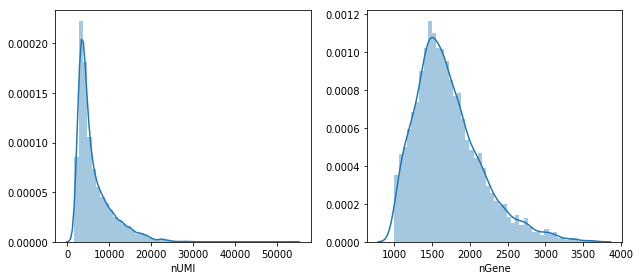

In [2]:
montoro_10x = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Montoro_10x/data.h5")
utils.peek(montoro_10x, "Montoro_10x")
montoro_10x = montoro_10x.normalize()
montoro_10x.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor", rmbatch_module="RMBatch")
montoro_10x_model = cb.directi.fit_DIRECTi(
    montoro_10x, montoro_10x.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Montoro_10x/model_0"
)
montoro_10x.latent = montoro_10x_model.inference(montoro_10x)

[DIRECTi epoch 0] train=3.266, val=3.278, time elapsed=1.5s Regular save...
[DIRECTi epoch 1] train=3.234, val=3.220, time elapsed=0.6s
[DIRECTi epoch 2] train=2.764, val=1.428, time elapsed=0.5s
[DIRECTi epoch 3] train=1.243, val=2.143, time elapsed=0.6s
[DIRECTi epoch 4] train=1.206, val=1.840, time elapsed=0.5s
[DIRECTi epoch 5] train=1.167, val=1.308, time elapsed=0.6s
[DIRECTi epoch 6] train=1.131, val=1.160, time elapsed=0.5s
[DIRECTi epoch 7] train=1.121, val=1.147, time elapsed=0.5s
[DIRECTi epoch 8] train=1.111, val=1.167, time elapsed=0.6s
[DIRECTi epoch 9] train=1.100, val=1.118, time elapsed=0.5s
[DIRECTi epoch 10] train=1.091, val=1.106, time elapsed=0.5s Regular save...
[DIRECTi epoch 11] train=1.084, val=1.102, time elapsed=0.5s
[DIRECTi epoch 12] train=1.080, val=1.090, time elapsed=0.5s
[DIRECTi epoch 13] train=1.074, val=1.081, time elapsed=0.5s
[DIRECTi epoch 14] train=1.064, val=1.071, time elapsed=0.5s
[DIRECTi epoch 15] train=1.058, val=1.067, time elapsed=0.6s
[D

[  Info   ] Computing tSNE...


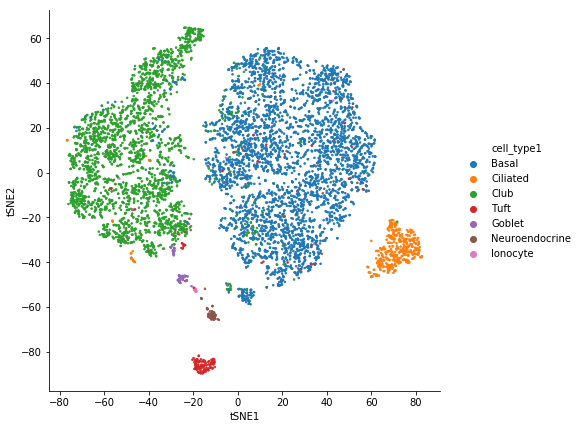

In [4]:
plot = montoro_10x.visualize_latent("cell_type1")
plot.get_figure().savefig("Montoro_10x/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


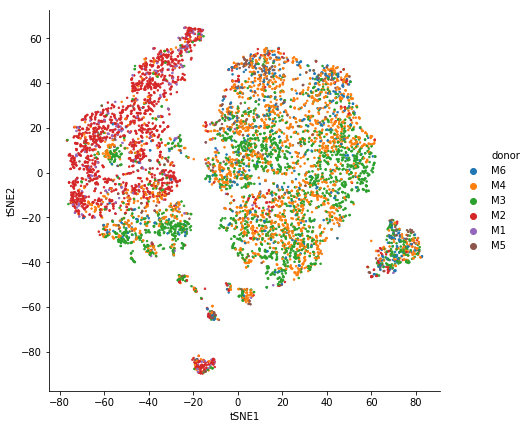

In [5]:
plot = montoro_10x.visualize_latent("donor")
plot.get_figure().savefig("Montoro_10x/donor.pdf", bbox_inches="tight")

In [6]:
%%capture capio
montoro_10x_models = [montoro_10x_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    montoro_10x_models.append(cb.directi.fit_DIRECTi(
        montoro_10x, montoro_10x.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Montoro_10x/model_%d" % i
    ))
montoro_10x_blast = cb.blast.BLAST(montoro_10x_models, montoro_10x, keep_exprs=True).build_empirical()
montoro_10x_blast.save("Montoro_10x")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Montoro_10x/model_1/checkpoint-179
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Montoro_10x/model_2/checkpoint-130
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Montoro_10x/model_3/checkpoint-139


In [7]:
with open("Montoro_10x/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Montoro_10x/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(montoro_10x_blast, "Montoro_10x")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9924
Accuracy = 0.9643


### Plasschaert

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cell_type2,dataset_name,disease,donor,library,mito,organ,organism,platform,umi_count
1,lung neuroendocrine cell,CL:1000223,PNEC,PNEC,Plasschaert,uninjured,uninjured_mouse_id_57,nov2016_10,0.099695,Trachea,Mus musculus,inDrop,4915.0
2,ciliated columnar cell of tracheobronchial tree,CL:0002145,Ciliated,Ciliated,Plasschaert,uninjured,uninjured_mouse_id_56,jul2016_12,0.074952,Trachea,Mus musculus,inDrop,4723.0
3,club cell,CL:0000158,Secretory,Secretory,Plasschaert,uninjured,uninjured_mouse_id_57,jul2016_8,0.071036,Trachea,Mus musculus,inDrop,12557.0
5,basal cell of epithelium of trachea,CL:1000348,Basal,Basal,Plasschaert,uninjured,uninjured_mouse_id_55,nov2016_2,0.064850,Trachea,Mus musculus,inDrop,6384.0
7,club cell,CL:0000158,Secretory,Secretory,Plasschaert,uninjured,uninjured_mouse_id_57,jul2016_8,0.083024,Trachea,Mus musculus,inDrop,11852.0


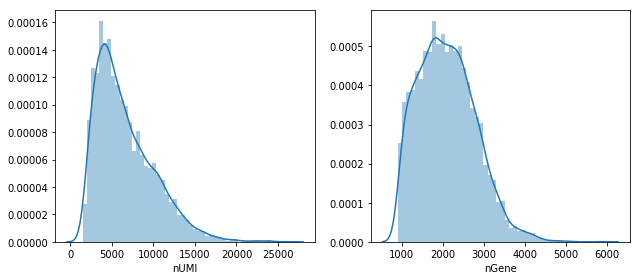

In [9]:
plasschaert = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Plasschaert/data.h5")
utils.peek(plasschaert, "Plasschaert")
plasschaert = plasschaert.normalize()
plasschaert.obs.head()

In [10]:
plasschaert_model = cb.directi.fit_DIRECTi(
    plasschaert, plasschaert.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Plasschaert/model_0"
)
plasschaert.latent = plasschaert_model.inference(plasschaert)

[DIRECTi epoch 0] train=2.546, val=2.539, time elapsed=1.2s Best save...
[DIRECTi epoch 1] train=2.524, val=2.503, time elapsed=0.5s Best save...
[DIRECTi epoch 2] train=2.393, val=1.741, time elapsed=0.5s Best save...
[DIRECTi epoch 3] train=1.130, val=1.378, time elapsed=0.5s Best save...
[DIRECTi epoch 4] train=0.937, val=1.506, time elapsed=0.5s
[DIRECTi epoch 5] train=0.933, val=1.153, time elapsed=0.5s Best save...
[DIRECTi epoch 6] train=0.916, val=1.088, time elapsed=0.5s Best save...
[DIRECTi epoch 7] train=0.883, val=1.085, time elapsed=0.6s Best save...
[DIRECTi epoch 8] train=0.872, val=0.957, time elapsed=0.6s Best save...
[DIRECTi epoch 9] train=0.860, val=0.891, time elapsed=0.5s Best save...
[DIRECTi epoch 10] train=0.852, val=0.879, time elapsed=0.6s Best save...
[DIRECTi epoch 11] train=0.848, val=0.880, time elapsed=0.6s
[DIRECTi epoch 12] train=0.847, val=0.863, time elapsed=0.5s Best save...
[DIRECTi epoch 13] train=0.844, val=0.854, time elapsed=0.5s Best save...


[  Info   ] Computing tSNE...


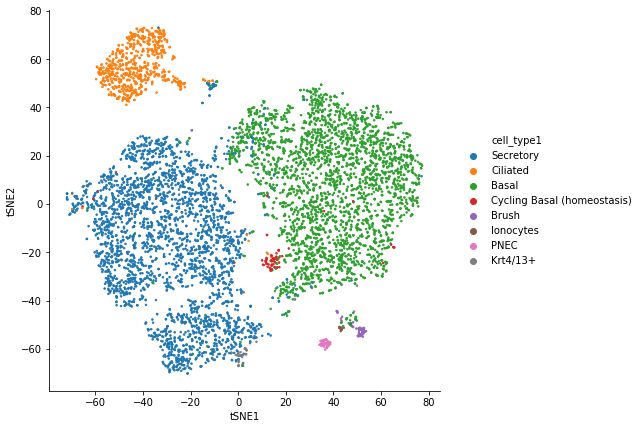

In [11]:
plot = plasschaert.visualize_latent("cell_type1")
plot.get_figure().savefig("Plasschaert/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


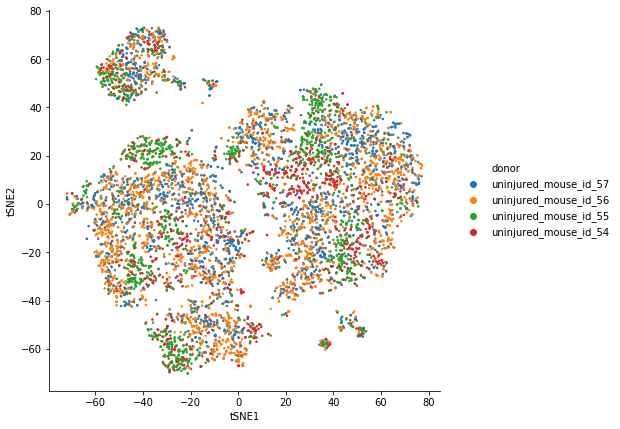

In [12]:
plot = plasschaert.visualize_latent("donor")
plot.get_figure().savefig("Plasschaert/donor.pdf", bbox_inches="tight")

In [13]:
%%capture capio
plasschaert_models = [plasschaert_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    plasschaert_models.append(cb.directi.fit_DIRECTi(
        plasschaert, plasschaert.uns["seurat_genes"],
        **fixed_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Plasschaert/model_%d" % i
    ))
plasschaert_blast = cb.blast.BLAST(plasschaert_models, plasschaert, keep_exprs=True).build_empirical()
plasschaert_blast.save("Plasschaert")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Plasschaert/model_1/checkpoint-112
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Plasschaert/model_2/checkpoint-183
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Plasschaert/model_3/checkpoint-137


In [14]:
with open("Plasschaert/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Plasschaert/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [15]:
utils.self_projection(plasschaert_blast, "Plasschaert")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9850
Accuracy = 0.9876


## Mouse aligned

In [16]:
if not os.path.exists("ALIGNED_Mus_musculus_Trachea"):
    os.makedirs("ALIGNED_Mus_musculus_Trachea")
montoro_smart_seq2 = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Montoro_Smart-seq2/data.h5").normalize()
montoro_10x.obs["montoro_10x_donor"] = montoro_10x.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    montoro_10x=montoro_10x, 
    plasschaert=plasschaert,
    montoro_smart_seq2=montoro_smart_seq2
), merge_uns_slots=["seurat_genes"]).normalize()

[ Warning ] 15680 out of 34068 variables are not found, will be set to zero!
[ Warning ] 5863 out of 34068 variables are not found, will be set to zero!
[ Warning ] 10648 out of 34068 variables are not found, will be set to zero!
[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [17]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "montoro_10x_donor"],
    rmbatch_module=["Adversarial", "RMBatch"],
    rmbatch_module_kwargs=[dict(lambda_reg=0.005), dict()]
)
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Trachea/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=2.179, val=2.162, time elapsed=2.4s Regular save...
[DIRECTi epoch 1] train=1.437, val=0.985, time elapsed=1.4s
[DIRECTi epoch 2] train=0.787, val=0.806, time elapsed=1.4s
[DIRECTi epoch 3] train=0.755, val=0.739, time elapsed=1.4s
[DIRECTi epoch 4] train=0.720, val=0.718, time elapsed=1.4s
[DIRECTi epoch 5] train=0.707, val=0.714, time elapsed=1.4s
[DIRECTi epoch 6] train=0.702, val=0.713, time elapsed=1.4s
[DIRECTi epoch 7] train=0.699, val=0.706, time elapsed=1.4s
[DIRECTi epoch 8] train=0.696, val=0.707, time elapsed=1.4s
[DIRECTi epoch 9] train=0.694, val=0.704, time elapsed=1.3s
[DIRECTi epoch 10] train=0.691, val=0.696, time elapsed=1.4s Regular save...
[DIRECTi epoch 11] train=0.688, val=0.705, time elapsed=1.4s
[DIRECTi epoch 12] train=0.685, val=0.696, time elapsed=1.5s
[DIRECTi epoch 13] train=0.681, val=0.692, time elapsed=1.4s
[DIRECTi epoch 14] train=0.678, val=0.690, time elapsed=1.4s
[DIRECTi epoch 15] train=0.675, val=0.683, time elapsed=1.4s
[D

[  Info   ] Computing tSNE...


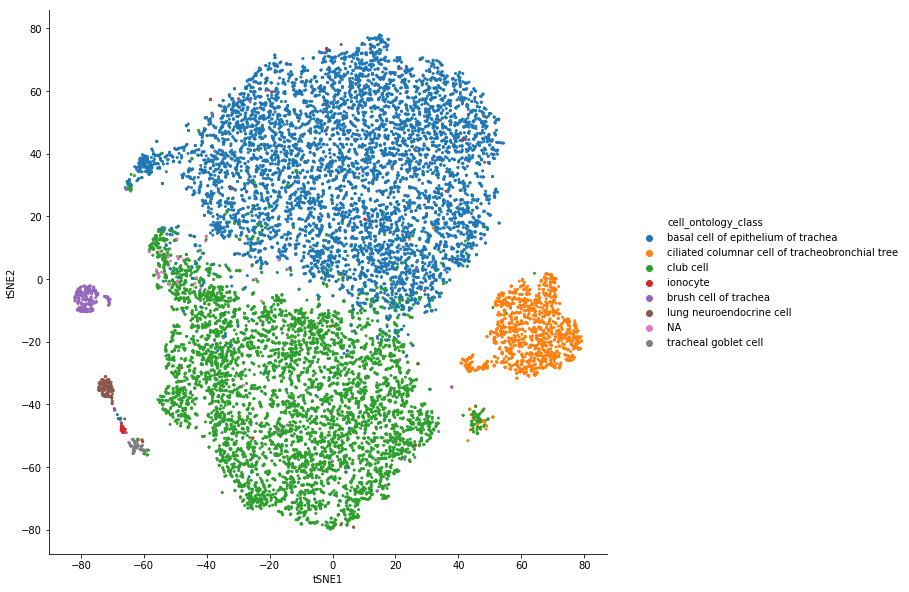

In [18]:
plot = mouse.visualize_latent("cell_ontology_class", width=10, height=10, size=5)
plot.get_figure().savefig("ALIGNED_Mus_musculus_Trachea/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


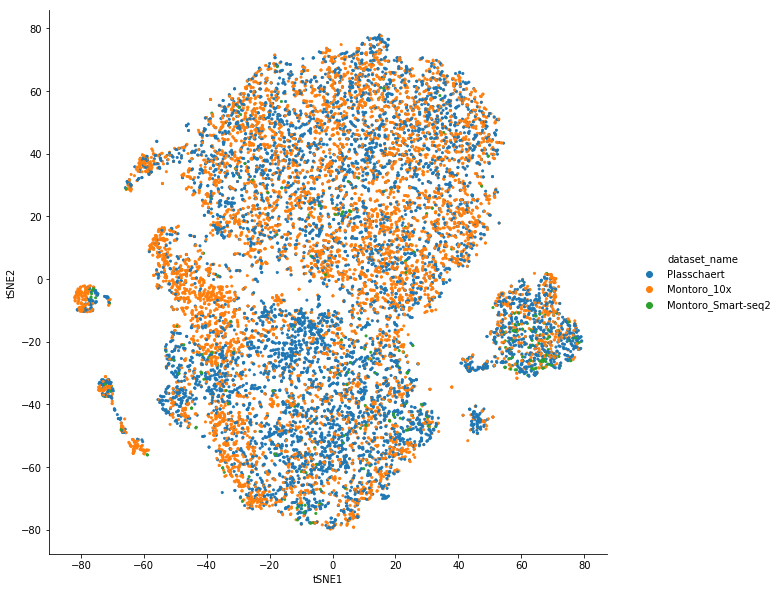

In [19]:
plot = mouse.visualize_latent("dataset_name", width=10, height=10, size=5)
plot.get_figure().savefig("ALIGNED_Mus_musculus_Trachea/dataset_name.pdf", bbox_inches="tight")

In [20]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Trachea/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Trachea")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Trachea/model_1/checkpoint-101
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Trachea/model_2/checkpoint-117
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Trachea/model_3/checkpoint-140


In [21]:
with open("ALIGNED_Mus_musculus_Trachea/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Trachea/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [22]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Trachea")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9875
Accuracy = 0.9724


### Quake_10x_Trachea

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P8_14_AAACCTGAGACGCTTT,mesenchymal cell,CL:0008019,mesenchymal cell,0.0,Quake_10x_Trachea,3-M-5/6,,M,Trachea,Mus musculus,10X_P8_14,10x,
10X_P8_14_AAACCTGAGGAGTAGA,mesenchymal cell,CL:0008019,mesenchymal cell,1.0,Quake_10x_Trachea,3-M-5/6,,M,Trachea,Mus musculus,10X_P8_14,10x,
10X_P8_14_AAACCTGCATGGAATA,mesenchymal cell,CL:0008019,mesenchymal cell,1.0,Quake_10x_Trachea,3-M-5/6,,M,Trachea,Mus musculus,10X_P8_14,10x,
10X_P8_14_AAACCTGGTACCCAAT,mesenchymal cell,CL:0008019,mesenchymal cell,0.0,Quake_10x_Trachea,3-M-5/6,,M,Trachea,Mus musculus,10X_P8_14,10x,
10X_P8_14_AAACCTGGTCGTTGTA,mesenchymal cell,CL:0008019,mesenchymal cell,2.0,Quake_10x_Trachea,3-M-5/6,,M,Trachea,Mus musculus,10X_P8_14,10x,


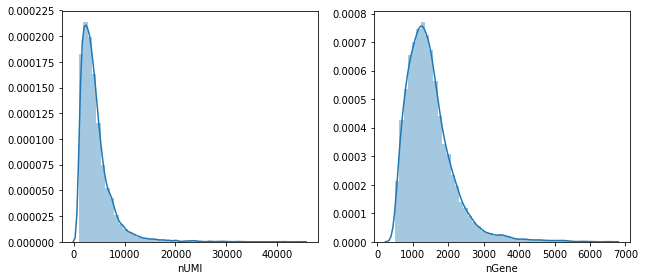

In [23]:
quake_10x_trachea = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Trachea/data.h5")
utils.peek(quake_10x_trachea, "Quake_10x_Trachea")
quake_10x_trachea = quake_10x_trachea.normalize()
quake_10x_trachea.obs.head()

In [24]:
opt_model_kwargs = dict(batch_effect="donor")
quake_10x_trachea_model = cb.directi.fit_DIRECTi(
    quake_10x_trachea, quake_10x_trachea.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs, 
    path="/tmp/cb/db/Quake_10x_Trachea/model_0"
)
quake_10x_trachea.latent = quake_10x_trachea_model.inference(quake_10x_trachea)

[DIRECTi epoch 0] train=2.239, val=2.222, time elapsed=1.9s Regular save...
[DIRECTi epoch 1] train=1.994, val=0.982, time elapsed=1.0s
[DIRECTi epoch 2] train=0.741, val=0.762, time elapsed=1.1s
[DIRECTi epoch 3] train=0.712, val=0.707, time elapsed=1.0s
[DIRECTi epoch 4] train=0.685, val=0.671, time elapsed=1.0s
[DIRECTi epoch 5] train=0.663, val=0.656, time elapsed=1.0s
[DIRECTi epoch 6] train=0.653, val=0.658, time elapsed=1.1s
[DIRECTi epoch 7] train=0.647, val=0.647, time elapsed=1.0s
[DIRECTi epoch 8] train=0.638, val=0.633, time elapsed=1.0s
[DIRECTi epoch 9] train=0.632, val=0.633, time elapsed=1.1s
[DIRECTi epoch 10] train=0.627, val=0.625, time elapsed=1.1s Regular save...
[DIRECTi epoch 11] train=0.622, val=0.617, time elapsed=1.1s
[DIRECTi epoch 12] train=0.618, val=0.615, time elapsed=1.1s
[DIRECTi epoch 13] train=0.615, val=0.613, time elapsed=1.0s
[DIRECTi epoch 14] train=0.613, val=0.610, time elapsed=1.1s
[DIRECTi epoch 15] train=0.610, val=0.608, time elapsed=1.0s
[D

[  Info   ] Computing tSNE...


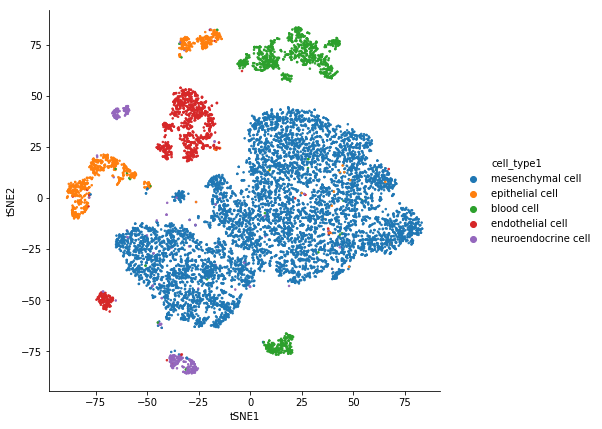

In [25]:
plot = quake_10x_trachea.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Trachea/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


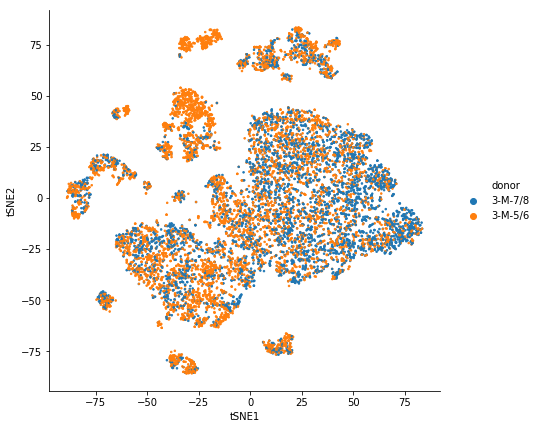

In [26]:
plot = quake_10x_trachea.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Trachea/donor.pdf", bbox_inches="tight")

In [27]:
%%capture capio
quake_10x_trachea_models = [quake_10x_trachea_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_trachea_models.append(cb.directi.fit_DIRECTi(
        quake_10x_trachea, quake_10x_trachea.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_10x_Trachea/model_%d" % i
    ))
quake_10x_trachea_blast = cb.blast.BLAST(quake_10x_trachea_models, quake_10x_trachea, keep_exprs=True).build_empirical()
quake_10x_trachea_blast.save("Quake_10x_Trachea")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Trachea/model_1/checkpoint-123
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Trachea/model_2/checkpoint-116
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Trachea/model_3/checkpoint-114


In [28]:
with open("Quake_10x_Trachea/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Trachea/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [29]:
utils.self_projection(quake_10x_trachea_blast, "Quake_10x_Trachea")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9951
Accuracy = 0.9909


### Quake_Smart-seq2_Trachea

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
A7.D042474.3_8_M.1.1,epithelial cell,CL:0000066,epithelial cell,D042474,3.0,Quake_Smart-seq2_Trachea,3_8_M,,M,Trachea,Mus musculus,Smart-seq2,
B21.D042474.3_8_M.1.1,endothelial cell,CL:0000115,endothelial cell,D042474,5.0,Quake_Smart-seq2_Trachea,3_8_M,,M,Trachea,Mus musculus,Smart-seq2,
D16.D042474.3_8_M.1.1,blood cell,CL:0000081,blood cell,D042474,4.0,Quake_Smart-seq2_Trachea,3_8_M,,M,Trachea,Mus musculus,Smart-seq2,
F10.D042474.3_8_M.1.1,endothelial cell,CL:0000115,endothelial cell,D042474,5.0,Quake_Smart-seq2_Trachea,3_8_M,,M,Trachea,Mus musculus,Smart-seq2,
H14.D042474.3_8_M.1.1,endothelial cell,CL:0000115,endothelial cell,D042474,5.0,Quake_Smart-seq2_Trachea,3_8_M,,M,Trachea,Mus musculus,Smart-seq2,


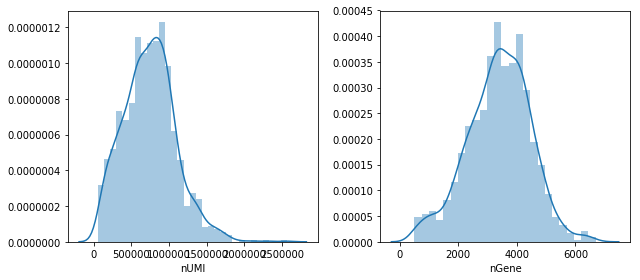

In [30]:
quake_smart_seq2_trachea = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Trachea/data.h5")
utils.peek(quake_smart_seq2_trachea, "Quake_Smart-seq2_Trachea")
quake_smart_seq2_trachea = quake_smart_seq2_trachea.normalize()
quake_smart_seq2_trachea.obs.head()

In [31]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_trachea_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_trachea, quake_smart_seq2_trachea.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs, 
    path="/tmp/cb/db/Quake_Smart-seq2_Trachea/model_0"
)
quake_smart_seq2_trachea.latent = quake_smart_seq2_trachea_model.inference(quake_smart_seq2_trachea)

[DIRECTi epoch 0] train=2.665, val=2.799, time elapsed=1.0s Regular save...
[DIRECTi epoch 1] train=2.658, val=2.794, time elapsed=0.1s
[DIRECTi epoch 2] train=2.653, val=2.788, time elapsed=0.1s
[DIRECTi epoch 3] train=2.648, val=2.781, time elapsed=0.1s
[DIRECTi epoch 4] train=2.639, val=2.773, time elapsed=0.1s
[DIRECTi epoch 5] train=2.633, val=2.765, time elapsed=0.1s
[DIRECTi epoch 6] train=2.625, val=2.756, time elapsed=0.1s
[DIRECTi epoch 7] train=2.614, val=2.746, time elapsed=0.1s
[DIRECTi epoch 8] train=2.608, val=2.735, time elapsed=0.1s
[DIRECTi epoch 9] train=2.593, val=2.720, time elapsed=0.1s
[DIRECTi epoch 10] train=2.577, val=2.694, time elapsed=0.1s Regular save...
[DIRECTi epoch 11] train=2.543, val=2.648, time elapsed=0.1s
[DIRECTi epoch 12] train=2.464, val=2.565, time elapsed=0.1s
[DIRECTi epoch 13] train=2.264, val=2.331, time elapsed=0.1s
[DIRECTi epoch 14] train=1.972, val=1.935, time elapsed=0.1s
[DIRECTi epoch 15] train=1.392, val=1.265, time elapsed=0.1s
[D

[  Info   ] Computing tSNE...


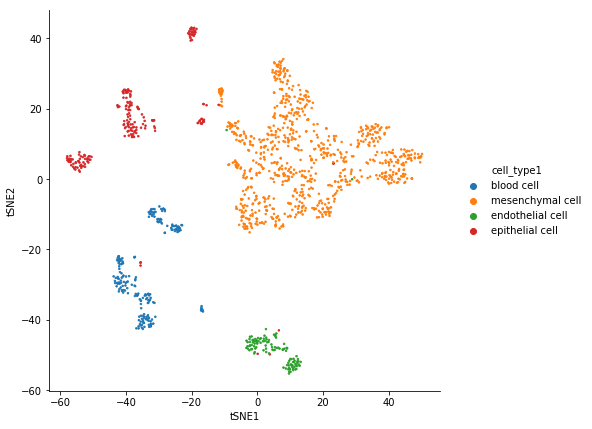

In [32]:
plot = quake_smart_seq2_trachea.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Trachea/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


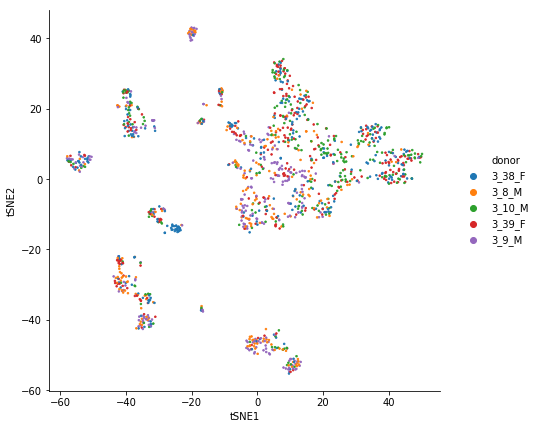

In [33]:
plot = quake_smart_seq2_trachea.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Trachea/donor.pdf", bbox_inches="tight")

In [34]:
%%capture capio
quake_smart_seq2_trachea_models = [quake_smart_seq2_trachea_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_trachea_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_trachea, quake_smart_seq2_trachea.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Trachea/model_%d" % i
    ))
quake_smart_seq2_trachea_blast = cb.blast.BLAST(quake_smart_seq2_trachea_models, quake_smart_seq2_trachea, keep_exprs=True).build_empirical()
quake_smart_seq2_trachea_blast.save("Quake_Smart-seq2_Trachea")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Trachea/model_1/checkpoint-368
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Trachea/model_2/checkpoint-250
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Trachea/model_3/checkpoint-317


In [35]:
with open("Quake_Smart-seq2_Trachea/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Trachea/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [36]:
utils.self_projection(quake_smart_seq2_trachea_blast, "Quake_Smart-seq2_Trachea")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9830
Accuracy = 0.9977
